Eine Bedarfskurve kann auf vier verschiedene Arten verlaufen: Sporadisch (unvorhersehbar), konstant (selbes Niveau), trendmäßig (steigend oder fallend) und saisonal (steigende und fallende Bereiche). 


| ![Verschiedene Arten von Bedarfsverläufe](../images/gleitende_durchschnitt/bedarfsverlauf.svg) |
| :----------------------------------------------------------: |
|      *Verschiedene Arten von Bedarfsverläufen*       |


# Konstantes Niveau

Bei einem konstanten Bedarf schwanken die Werte einer Zeitreihe unregelmäßig um ein konstantes Niveau. Es bieten sich zwei Instrumente zur Berechnung eines Prognosewertes an, den gleitenden Durchschnitt und die exponentielle Glättung erster Ordnung. 



Der gleitende Durchschnitt errechnet sich ähnlich wie der normale Mittelwert:

$${\frac {1}{n}}\sum _{i=1}^{n}{x_{i}}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}$$

$$oder$$

$$\hat{y}_{t+1} = \frac{1}{T}\sum^{t}_{\tau=t-T+1} y_t$$


Die Werte, aus denen der Mittelwert gebildet werden soll, werden addiert und die Summe wiederum durch die Anzahl der Werte geteilt. Die in die Prognose einbezogenen Vergangenheitswerte erhalten dieselbe Gewichtung.

# Problematiken
Während eine große Menge an Werten generell vorteilhaft ist, um Ausreißer herauszufiltern, ist dies bei der Bedarfsermittlung eher von Nachteil, da auch Vorperioden betrachtet werden in denen das Unternehmen anders ausgerichtet war oder einen geringeren Marktanteil hatte.



# Beispiel mit Python

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/gleitende_durchschnitt/duschgel.csv',  sep = ';' ,decimal = ',', header = None )
df.columns = ['A', 'B']
df

,A,B
0,1,106.8
1,2,129.2
2,3,153.0
3,4,149.1
4,5,158.3
5,6,132.9
6,7,149.8
7,8,140.3
8,9,138.3
9,10,152.2


Man berechnet den Mittelwert, indem man die Summe der betrachteten Zahlen durch ihre Anzahl teilt.

In [3]:
GD = (106.8 + 129.2 + 153.0) / 3
np.round(GD,1)

129.7

Um dies zu implementieren, wird die iloc-Funktion von Pandas verwendet. Die Position der Bedarfsspalte wird in der iloc-Funktion festgelegt. Während die Zeile eine Variable i ist, welche solange iteriert, bis das Ende des Datenframe erreicht wird. Greife selektiv auf die Zeile 0 zu. Dazu verwende den Locator iloc.
loc ruft Zeilen (und/oder Spalten) mit bestimmten Bezeichnungen ab.
iloc holt Zeilen (und/oder Spalten) an ganzzahligen Positionen. Siehe: https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different

In [4]:
df.iloc[0]

A      1.0
B    106.8
Name: 0, dtype: float64

In [5]:
x1 = df.iloc[0,1]
print(x1)
x2 = df.iloc[1,1]
print(x2)
x3 = df.iloc[2,1]
print(x3)

106.8
129.2
153.0


In [6]:
df.loc[df.index[0 + 2]]

A      3.0
B    153.0
Name: 2, dtype: float64

In [11]:
for x in range(0,df.shape[0]-2):
    df.loc[df.index[x + 2], 'GD_3'] = np.round(((df.iloc[x, 1] + df.iloc[x + 1, 1] + df.iloc[x + 2, 1]) /3), 1)

In [30]:
df

,A,B,GD_3
0,1,106.8,NaN
1,2,129.2,NaN
2,3,153.0,129.7
3,4,149.1,143.8
4,5,158.3,153.5
5,6,132.9,146.8
6,7,149.8,147.0
7,8,140.3,141.0
8,9,138.3,142.8
9,10,152.2,143.6


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

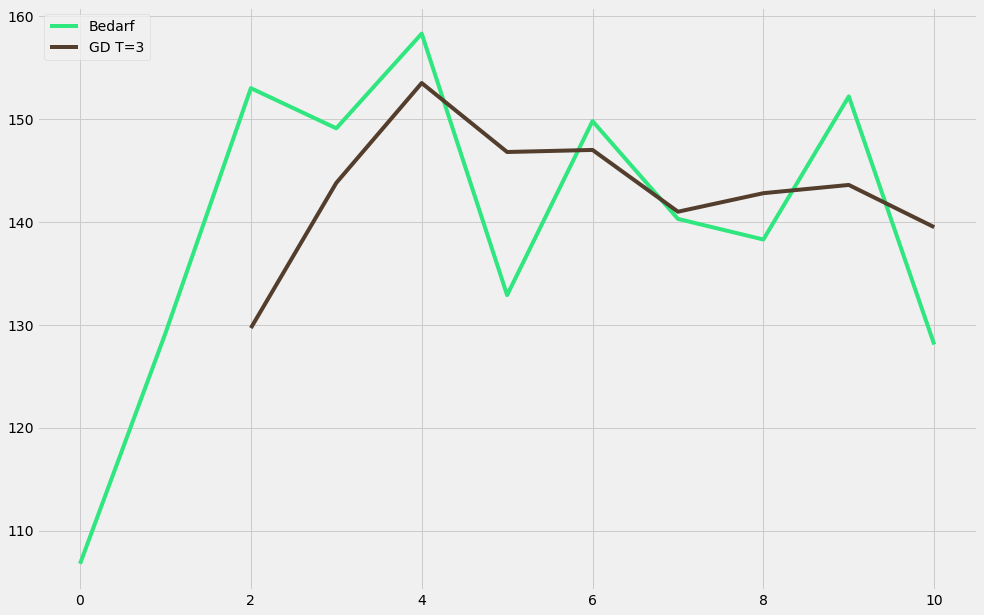

In [21]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['B'],label='Bedarf',color='#30e67f')
plt.plot(df['GD_3'],label='GD T=3',color='#533E2D')
plt.legend(loc=2)

# Überprüfung der Ergebnisse

Wir überprüfen unser Vorgehen mit der eingebauten pandas Funktion rolling.

In [13]:
df

,A,B,GD_3
0,1,106.8,NaN
1,2,129.2,NaN
2,3,153.0,129.7
3,4,149.1,143.8
4,5,158.3,153.5
5,6,132.9,146.8
6,7,149.8,147.0
7,8,140.3,141.0
8,9,138.3,142.8
9,10,152.2,143.6


In [16]:
df['Rolling'] = df['B'].rolling(3).mean()
df

,A,B,GD_3,Rolling
0,1,106.8,NaN,NaN
1,2,129.2,NaN,NaN
2,3,153.0,129.7,129.666667
3,4,149.1,143.8,143.766667
4,5,158.3,153.5,153.466667
5,6,132.9,146.8,146.766667
6,7,149.8,147.0,147.000000
7,8,140.3,141.0,141.000000
8,9,138.3,142.8,142.800000
9,10,152.2,143.6,143.600000


Quellen:
[1] https://www.ingenieurkurse.de/produktion/aggregierte-produktionsplanung/einstufige-produktionsprogrammplanung/einstufige-mehrperiodige-produktionsprogrammplanung/prognosen-zur-nachfrageentwicklung/methode-des-gleitenden-durchschnitts.html
    
[2]  https://otexts.com/fpp2/decomposition.html
    
[3] https://www.cmegroup.com/education/courses/technical-analysis/understanding-moving-averages.html

[4] https://www.uni-siegen.de/smi/aktuelles/bestandsmanagement_wolf.pdf

[5] https://de.wikibooks.org/wiki/Materialwirtschaft:_Beschaffung:_Bedarfsarten_und_Bedarfsermittlung

[6] https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
